3. Обробка та класифікація текстових даних

Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. 

In [36]:
import pandas as pd
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

data = pd.read_csv('article_level_data.csv')


data.head(10)


,Unnamed: 0,article,class
0,0,NLP is a multidisciplinary field that draws fr...,0
1,1,There are a variety of emerging applications f...,0
2,2,As each new means of communication and social ...,0
3,3,"These suggestions include:, Learn about the pu...",0
4,4,In recent years there has been growing concern...,0
5,5,"By the late 1970s, researchers at many major u...",0
6,6,Netnews postings are simply text files that be...,0
7,7,The servers are linked into a branching distri...,0
8,8,"In the 1940s, the main objective in developing...",0
9,9,According to the OSI (open systems interconnec...,0


In [37]:
print(data.columns)

Index(['Unnamed: 0', 'article', 'class'], dtype='object')


In [38]:
df = data.drop(['Unnamed: 0'], axis=1)

In [39]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
stopWords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dmytro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dmytro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dmytro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stopWords])
    return text

df['article'] = df['article'].apply(preprocess_text)

df.head(10)

,article,class
0,nlp multidisciplinary field draws linguistics ...,0
1,variety emerging applications nlp including fo...,0
2,new means communication social interaction int...,0
3,suggestions include learn purpose newsgroup po...,0
4,recent years growing concern internet users ma...,0
5,late researchers many major universities using...,0
6,netnews postings simply text files begin set s...,0
7,servers linked branching distribution system m...,0
8,main objective developing first digital comput...,0
9,according osi open systems interconnection mod...,0


WordCloud

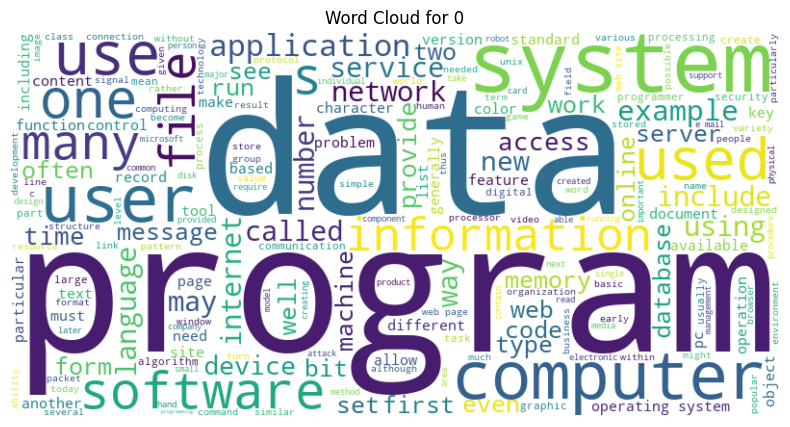

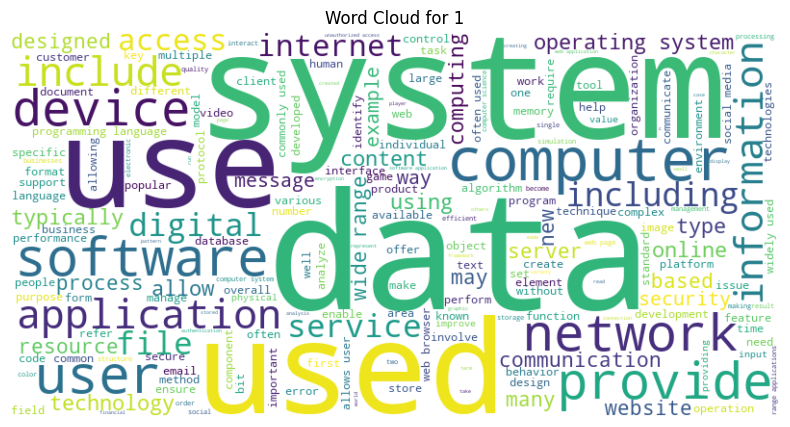

In [41]:
for category in df['class'].unique():#[:5]:
    text = ' '.join(df[df['class'] == category]['article'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {category}")
    plt.show()

Vectorisation

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df['article'], df['class'], test_size=0.20)
print(X_train.shape, y_train.shape)

tfidf = TfidfVectorizer(max_features=5000)
X_train_transformed = tfidf.fit_transform(X_train)
X_test_transformed = tfidf.transform(X_test)

(814,) (814,)


In [43]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=100),
}

In [44]:
accuracy_value={}

In [45]:
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_value[name] = {'accuracy': accuracy}
    
    print(f"Classifier: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))

Classifier: Naive Bayes
[[69 44]
 [ 7 84]]
              precision    recall  f1-score   support

           0       0.91      0.61      0.73       113
           1       0.66      0.92      0.77        91

    accuracy                           0.75       204
   macro avg       0.78      0.77      0.75       204
weighted avg       0.80      0.75      0.75       204

Classifier: Logistic Regression
[[85 28]
 [13 78]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       113
           1       0.74      0.86      0.79        91

    accuracy                           0.80       204
   macro avg       0.80      0.80      0.80       204
weighted avg       0.81      0.80      0.80       204

